In [1]:
import numpy as np
from sklearn import svm
import matplotlib.colors
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
import warnings

In [2]:
def show_accurancy(a,b):
    acc=a.ravel()==b.ravel()
    print('accurancy: %.2f%%' % (100*float(acc.sum())/a.size))

In [3]:
def show_recall(y,y_hat):
    print('recall: %.2f%%' % (100*float(np.sum(y_hat[y==1]==1))/y[y==1].size))

In [4]:
c1=990
c2=10
N=c1+c2
x_c1=3*np.random.randn(c1,2)
x_c2=0.5*np.random.randn(c2,2)+4
x=np.vstack((x_c1,x_c2))
y=np.ones(N)
y[:c1]=-1

In [5]:
s=np.ones(N)*30
s[:c1]=10

In [6]:
clfs = [
    svm.SVC(C=1, kernel='linear'),
    svm.SVC(C=1, kernel='linear', class_weight={
        -1: 1,
        1: 10
    }),
    svm.SVC(C=0.8, kernel='rbf', gamma=0.5, class_weight={
        -1: 1,
        1: 2
    }),
    svm.SVC(C=0.8, kernel='rbf', gamma=0.5, class_weight={
        -1: 1,
        1: 10
    })
]

In [7]:
    titles = 'Linear', 'Linear, Weight=50', 'RBF, Weight=2', 'RBF, Weight=10'

In [8]:
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

In [9]:
cm_light = matplotlib.colors.ListedColormap(['#77E0A0', '#FF8080'])
cm_dark = matplotlib.colors.ListedColormap(['g', 'r'])

i : 0
i : 1


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


i : 2
i : 3


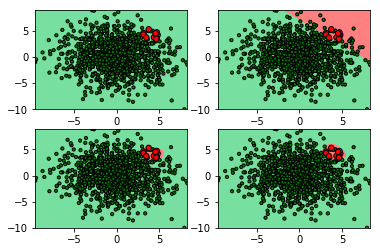

In [12]:
for i ,clf in enumerate(clfs):
    clf.fit(x,y)
    y_hat=clf.predict(x)
    
    print('i : %d' % i)
    
    accuracy_score(y, y_hat)
    precision_score(y, y_hat, pos_label=1)
    recall_score(y, y_hat, pos_label=1)
    f1_score(y, y_hat, pos_label=1)
    
    plt.subplot(2,2,i+1)
    grid_hat=clf.predict(grid_test)
    grid_hat=grid_hat.reshape(x1.shape)
    plt.pcolormesh(x1,x2,grid_hat,cmap=cm_light,alpha=0.8)
    plt.scatter(x[:,0],x[:,1],c=y,edgecolors='k',s=s,cmap=cm_dark)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
# plt.tight_layout()
plt.show()
    
    